In [145]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats
from tempfile import mkdtemp
from shutil import rmtree

from xgboost import XGBRegressor

from sklearn import set_config
set_config(display = 'diagram')

# Sklearn preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler

In [105]:
df=pd.read_csv('CAC40_stocks_2021_2023.csv')

In [106]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2020-04-08,28.559999,28.559999,26.639999,28.270000,28.270000,1051666.0,AC.PA
1,2020-04-09,28.629999,29.570000,28.049999,28.639999,28.639999,990955.0,AC.PA
2,2020-04-14,28.010000,28.340000,27.150000,27.590000,27.590000,907178.0,AC.PA
3,2020-04-15,27.170000,27.299999,25.459999,25.660000,25.660000,1378290.0,AC.PA
4,2020-04-16,25.879999,26.700001,24.080000,24.570000,24.570000,1474307.0,AC.PA


In [107]:
df.shape

(28564, 8)

In [108]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Stock        0
dtype: int64

In [20]:
#"data perfect not need for cleaning apparently last checking"

In [140]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Year
count,28564,28564.000000,28564.000000,28564.000000,28564.000000,28564.000000,2.856400e+04,28564.000000
mean,2021-10-08 22:11:48.808290304,126.695122,128.196185,125.189584,126.748910,124.279567,1.899155e+06,2021.268135
min,2020-04-08 00:00:00,6.306000,6.480000,6.154000,6.196000,5.281056,8.388000e+03,2020.000000
25%,2021-01-10 06:00:00,25.793750,26.150000,25.430000,25.760000,24.780001,4.992795e+05,2021.000000
50%,2021-10-09 12:00:00,54.535000,55.119999,53.880001,54.560001,51.989380,1.048304e+06,2021.000000
75%,2022-07-08 18:00:00,114.342497,115.699997,113.004999,114.424999,112.652555,2.222609e+06,2022.000000
max,2023-04-06 00:00:00,1906.800049,1918.800049,1893.800049,1909.199951,1909.199951,7.109522e+07,2023.000000
std,NaN,224.510215,227.183213,221.798262,224.686884,222.558216,2.445595e+06,0.928478


In [143]:
df['Close'].mean()

126.74890961361238

In [144]:
df['Close'].median()

54.560001373291016

In [110]:
df['Date']=pd.to_datetime(df['Date']).dt.normalize()

In [111]:
df['Year'] = df['Date'].dt.year 

In [156]:
df['Month'] = df['Date'].dt.month 

In [172]:
a=df['Month'].sort_values(ascending=True).unique()
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [112]:
df['Year']

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
28559    2023
28560    2023
28561    2023
28562    2023
28563    2023
Name: Year, Length: 28564, dtype: int32

In [113]:
test=df.groupby('Year')['Close'].mean()
test

Year
2020    100.153460
2021    134.677804
2022    131.060963
2023    153.503865
Name: Close, dtype: float64

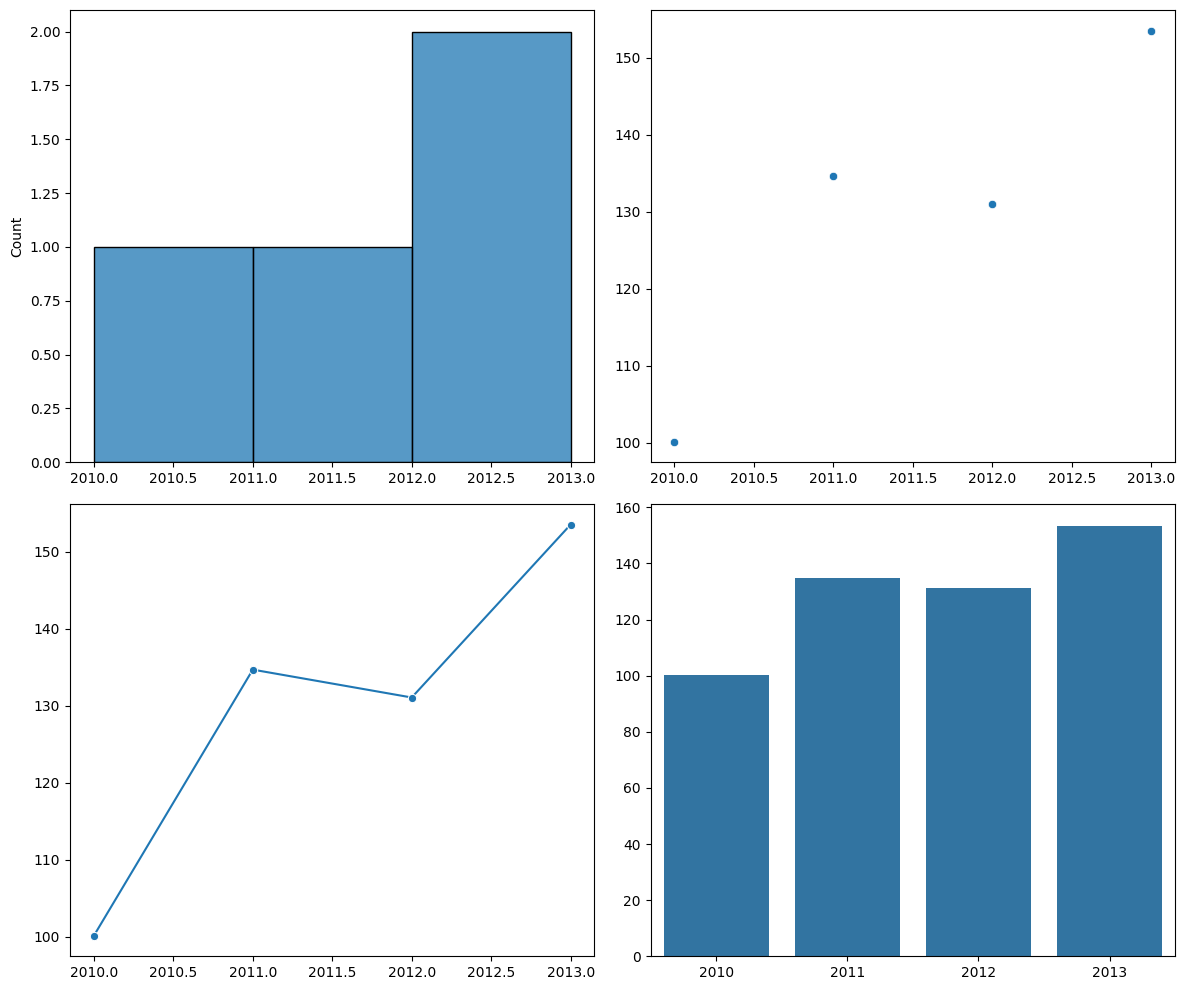

In [157]:
x = [2010, 2011, 2012, 2013] 
y = [100.153460, 134.677804, 131.060963, 153.503865]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(x=x, ax=axes[0, 0])

sns.scatterplot(x=x, y=y, ax=axes[0, 1])

sns.lineplot(x=x, y=y, ax=axes[1, 0], marker='o')

sns.barplot(x=x, y=y, ax=axes[1, 1])

plt.tight_layout()
plt.show()

In [158]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Stock',
       'Year', 'Month'],
      dtype='object')

In [184]:
x = df[['Close']]
y = df['Date']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [185]:
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import RobustScaler
imp=SimpleImputer(strategy='most_frequent')
x_train=imp.fit_transform(x_train)
x_test=imp.transform(x_train)
scaler=RobustScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

/home/matthieumouillon/.pyenv/versions/3.12.9/envs/lewagon/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(


In [155]:
#données fittées et scalées

In [186]:
import math

print( math.pi )

3.141592653589793


In [189]:
pi=math.pi

In [201]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

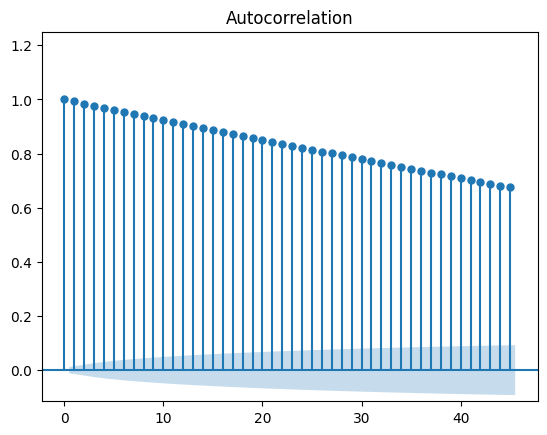

In [205]:
plot_acf(y, auto_ylims=True);

In [202]:
#df['sin_Month']= np.array(sin*(2*pi(df['Month']/12)))


In [213]:
#revoir les arima